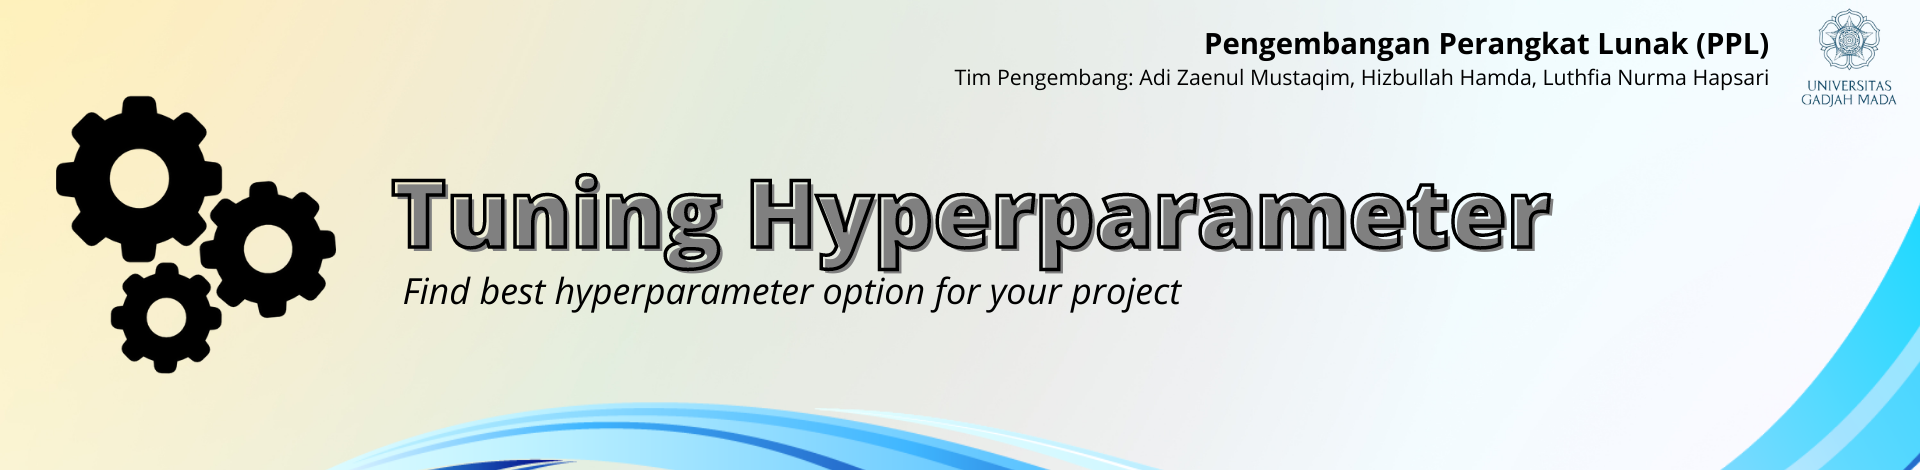

# Tuning Hyperparameter 

<strong>Apa itu tuning hyperparameter?</strong>

Sebuah proses untuk mencari hyperparameter yang optimal untuk digunakan pada proses training sehingga akan menghasilkan model machine learning (ML) yang baik dan high performance.

<strong>Kenapa tuning penting?</strong>

Merupakan langkah penting karena berhubungan langsung dengan performa model. Dengan mengetahui hyperparameter yang tepat, maka akan menghasilkan performa model yang baik.

<strong>Ilustrasi tuning hyperparameter</strong>

<div>
    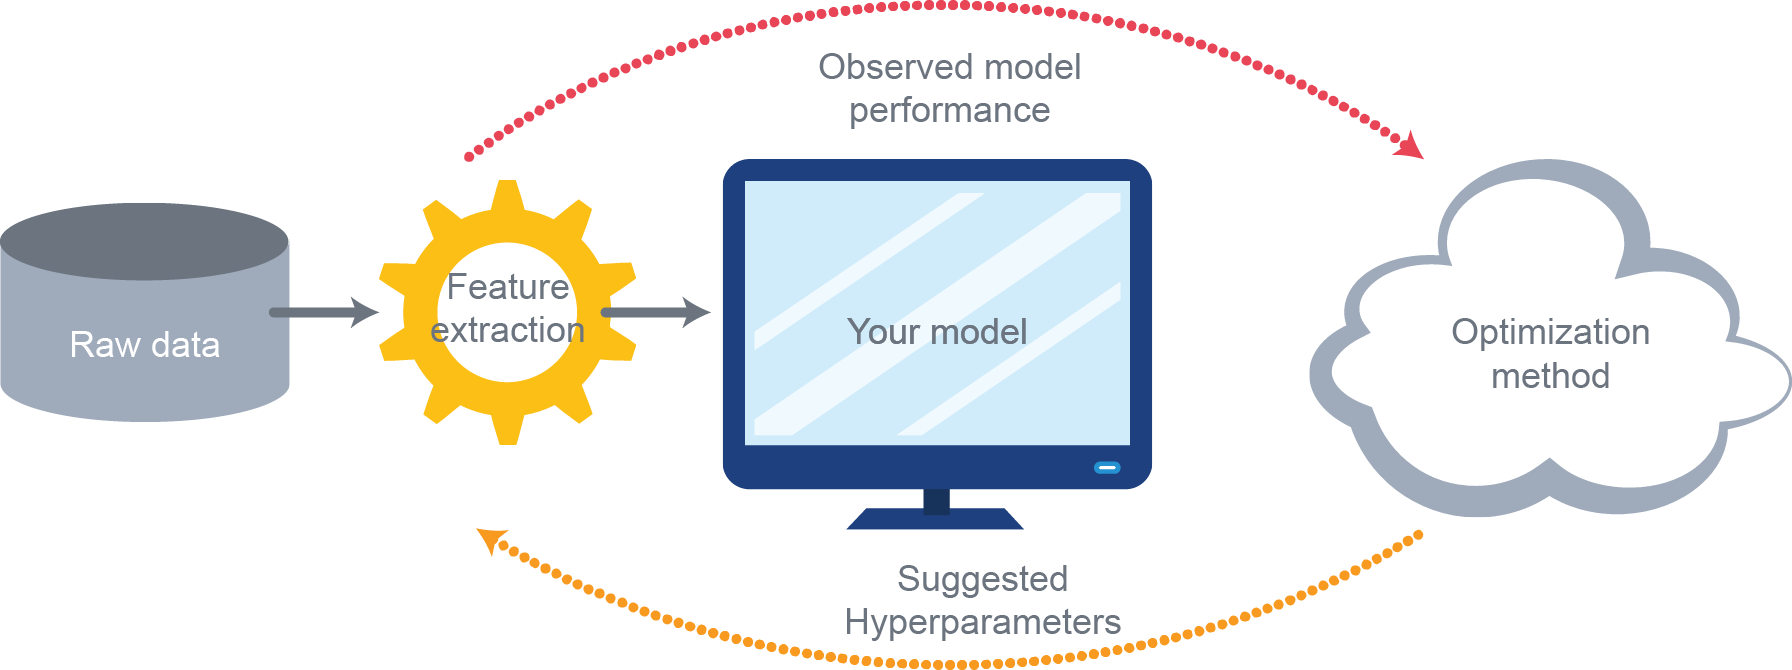
</div>

## 1. Upload Dataset

In [1]:
# import library
import pandas as pd

In [2]:
# load dataset
data = pd.read_csv('Dataset/fraud-dataset.csv')
data.head()

## 2. Cek Dataset

In [3]:
def GetNamaKelas(dataset):
    jumlahAtribut = len(dataset.columns) - 1
    namaKelas = dataset.columns[jumlahAtribut]
    
    return namaKelas

In [4]:
def InfoDataset(dataset):
    jumlahData = len(dataset.index)
    jumlahAtribut = len(dataset.columns) - 1
    dataKosong = dataset.isnull().values.any()
    
    print('Jumlah data    : %.f data' % jumlahData)
    print('Jumlah atribut : %.f atribut' % jumlahAtribut)
    print('Target         :', GetNamaKelas(dataset))
    print('Data kosong    : %.f' % dataKosong)
    
    if dataKosong == 0:
        print('Status         : Memenuhi syarat')
    else:
        print('Status         : Tidak memenuhi syarat')

In [5]:
InfoDataset(data)

## 3. Proses Tuning

In [6]:
def SplitData(dataset):
    namaKelas = GetNamaKelas(dataset)

    atribut = dataset.columns.tolist()
    atribut = [data for data in atribut if data not in namaKelas]

    # X: data atribut dan Y: data kelas/target
    X = dataset[atribut]
    y = dataset[namaKelas]
    
    return [X, y]

In [7]:
X = SplitData(data)[0]
y = SplitData(data)[1]

In [8]:
# Use scikit-learn to grid search the batch size and epochs
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from keras.callbacks import EarlyStopping

C:\Users\asus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
# Function to create model, required for KerasClassifier
def create_model(dropout_rate, activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim = 24, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [10]:
def Tuning(X, y):
    # fix random seed for reproducibility
    seed = 7
    tf.random.set_seed(seed)
    
    earlystopper = EarlyStopping(
        monitor = 'loss', 
        min_delta = 0, 
        patience = 15, 
        verbose= 1
    )
    
    # create model
    model = KerasClassifier(model= create_model, verbose=0, epochs= 200, callbacks = [earlystopper])
    
    # define the grid search parameters
    batch_size = [8, 16, 32, 64, 128, 256]
    optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adam']
    activation = ['relu', 'tanh', 'sigmoid']
    learn_rate = [0.001, 0.01, 0.1]
    dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    neurons = [32, 64, 128, 256, 512, 1024]
    
    param_grid = dict(batch_size= batch_size, optimizer = optimizer, 
                      optimizer__learning_rate= learn_rate, model__activation= activation, 
                     model__dropout_rate=dropout_rate)
    
    grid = GridSearchCV(estimator= model, param_grid= param_grid, n_jobs= -1, cv= 3)
    grid_result = grid.fit(X, y)
    
    return grid_result

In [11]:
def result():
    grid_result = Tuning(X, y)
    
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

## 4. Hasil Tuning

In [ ]:
result()